In [1]:
from test import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Performance

In [4]:
! pip install pandas

     |████████████████████████████████| 10.0 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 1.9 MB/s eta 0:00:01


In [15]:
from collections import defaultdict
from time import time
import pandas as pd

In [28]:
def performance(searcher, frame, start, stop, step, iterations=5):
    for size in range(start, stop + 1, step):
        t = 0.
        for _ in range(iterations):
            points, matrix = get_test_data(size)
            t_start = time()
            searcher(matrix, points)
            t += (time() - t_start)
        frame['time'].append(t / iterations)
        frame['size'].append(size)
        
    plt.show()

concorde 0.08398890495300293
b'/usr/local/bin/concorde /tmp/myroute_lkh.tsp\nHost: ca1f1f0ef80b  Current process id: 276\nUsing random seed 1591723087\nProblem Name: My Route\nProblem Type: TSP\nNumber of Nodes: 50\nExplicit Lengths (CC_MATRIXNORM)\nSet initial upperbound to 151986 (from tour)\n  LP Value  1: 146707.500000  (0.00 seconds)\n  LP Value  2: 151451.000000  (0.01 seconds)\n  LP Value  3: 151698.750000  (0.01 seconds)\n  LP Value  4: 151763.904762  (0.02 seconds)\n  LP Value  5: 151936.387755  (0.03 seconds)\n  LP Value  6: 151986.000000  (0.04 seconds)\nNew lower bound: 151986.000000\nFinal lower bound 151986.000000, upper bound 151986.000000\nExact lower bound: 151986.000000\nDIFF: 0.000000\nFinal LP has 81 rows, 115 columns, 835 nonzeros\nOptimal Solution: 151986.00\nNumber of bbnodes: 1\nTotal Running Time: 0.07 (seconds)\n'
Len: 27.407780719504853
concorde 0.08470010757446289
b'/usr/local/bin/concorde /tmp/myroute_lkh.tsp\nHost: ca1f1f0ef80b  Current process id: 279\nUs

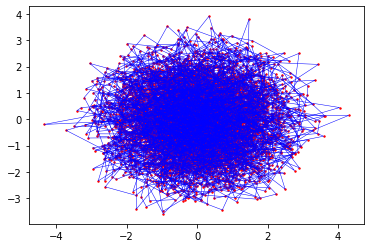

In [26]:
frame = defaultdict(list)
performance(test_tsp_concord, frame, 50, 500, 50)

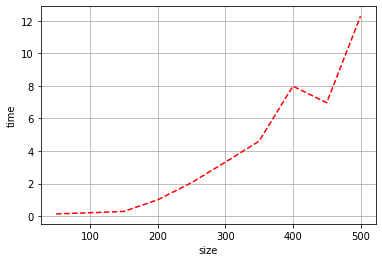

In [27]:
frame = pd.DataFrame(frame)
plt.plot(frame['size'], frame['time'], 'r--')
plt.grid('both')
plt.xlabel('size')
plt.ylabel('time')
plt.show()

lkh 0.040242671966552734
b'PARAMETER_FILE = /tmp/myroute_lkh.par\nReading PROBLEM_FILE: "/tmp/myroute_lkh.tsp" ... done\nASCENT_CANDIDATES = 49\nBACKBONE_TRIALS = 0\nBACKTRACKING = NO\n# BWTSP =\n# CANDIDATE_FILE =\nCANDIDATE_SET_TYPE = ALPHA\n# DEPOT =\n# EDGE_FILE =\nEXCESS = 0.02\nEXTERNAL_SALESMEN = 0\nEXTRA_CANDIDATES = 0 \nEXTRA_CANDIDATE_SET_TYPE = QUADRANT\nGAIN23 = YES\nGAIN_CRITERION = YES\nINITIAL_PERIOD = 100\nINITIAL_STEP_SIZE = 1\nINITIAL_TOUR_ALGORITHM = WALK\n# INITIAL_TOUR_FILE = \nINITIAL_TOUR_FRACTION = 1.000\n# INPUT_TOUR_FILE = \nKICK_TYPE = 0\nKICKS = 1\n# MAX_BREADTH =\nMAKESPAN = NO\nMAX_CANDIDATES = 5 \nMAX_SWAPS = 50\nMAX_TRIALS = 50\n# MERGE_TOUR_FILE =\nMOVE_TYPE = 5 \n# MTSP_MIN_SIZE =\n# MTSP_MAX_SIZE =\n# MTSP_OBJECTIVE =\n# MTSP_SOLUTION_FILE = \n# NONSEQUENTIAL_MOVE_TYPE = 5\n# OPTIMUM =\n# OUTPUT_TOUR_FILE = \nPATCHING_A = 1 \nPATCHING_C = 0 \n# PI_FILE = \nPOPMUSIC_INITIAL_TOUR = NO\nPOPMUSIC_MAX_NEIGHBORS = 5\nPOPMUSIC_SAMPLE_SIZE = 10\nPOPMUSIC_SOLU

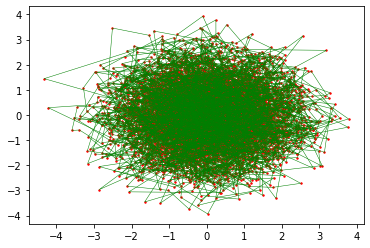

In [30]:
frame = defaultdict(list)
performance(test_tsp_lkh, frame, 50, 500, 50)

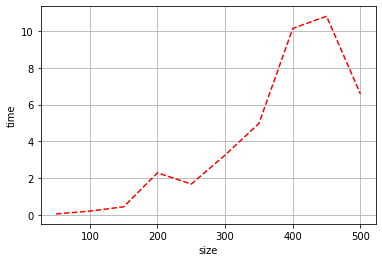

In [31]:
frame = pd.DataFrame(frame)
plt.plot(frame['size'], frame['time'], 'r--')
plt.grid('both')
plt.xlabel('size')
plt.ylabel('time')
plt.show()

In [32]:
! pip install seaborn

     |████████████████████████████████| 215 kB 1.7 MB/s eta 0:00:01


In [33]:
import seaborn as sns
sns.set(style="darkgrid")

concorde 0.0709531307220459
b'/usr/local/bin/concorde /tmp/myroute_lkh.tsp\nHost: ca1f1f0ef80b  Current process id: 789\nUsing random seed 1591725428\nProblem Name: My Route\nProblem Type: TSP\nNumber of Nodes: 50\nExplicit Lengths (CC_MATRIXNORM)\nSet initial upperbound to 129654 (from tour)\n  LP Value  1: 122974.500000  (0.00 seconds)\n  LP Value  2: 126735.000000  (0.00 seconds)\n  LP Value  3: 129459.000000  (0.01 seconds)\n  LP Value  4: 129654.000000  (0.01 seconds)\nNew lower bound: 129654.000000\nFinal lower bound 129654.000000, upper bound 129654.000000\nExact lower bound: 129654.000000\nDIFF: 0.000000\nFinal LP has 75 rows, 201 columns, 799 nonzeros\nOptimal Solution: 129654.00\nNumber of bbnodes: 1\nTotal Running Time: 0.06 (seconds)\n'
Len: 26.8171844015659
concorde 0.06378388404846191
b'/usr/local/bin/concorde /tmp/myroute_lkh.tsp\nHost: ca1f1f0ef80b  Current process id: 792\nUsing random seed 1591725428\nProblem Name: My Route\nProblem Type: TSP\nNumber of Nodes: 50\nExp

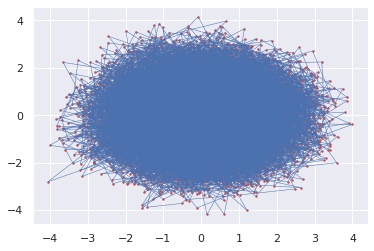

In [39]:
frame = defaultdict(list)

start, stop, step = 50, 500, 10
for size in range(start, stop + 1, step):
    for _ in range(5):
        points, matrix = get_test_data(size)
        t_start = time()
        test_tsp_concord(matrix, points)
        frame['time'].append(time() - t_start)
        frame['size'].append(size)
    
frame = pd.DataFrame(frame)

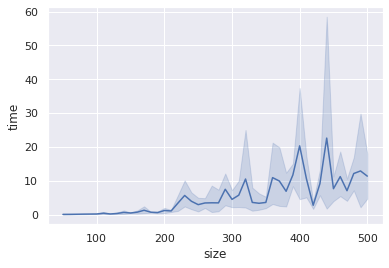

In [40]:
sns.lineplot(x="size", y="time", data=frame)